# Exploratory Data Analysis: Kickstarter Project 


**Importing Packages and Tools**

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
from matplotlib import pyplot as plt  

#supressing scientific notation 
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [2]:
#importing the data 
kick = pd.read_csv("C:/Users/mayaa/OneDrive/Documents/project_BA/Kickstarter-Project-/ks.csv")

In [3]:
# Keeping only failed and successful companies
kick = kick[(kick['state'] == 'failed') | (kick['state'] == 'successful')]

Note: The original kickstarter dataset had the values that were other than success or failure but we decided to ignore thos values for now. The values were "canceled", "undefined". 

In [4]:
kick.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,10/9/2015,1000.00000,8/11/2015 12:12,0.00000,failed,0,GB,0.00000,0.00000,1533.95000
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,11/1/2017,30000.00000,9/2/2017 4:43,2421.00000,failed,15,US,100.00000,2421.00000,30000.00000
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2/26/2013,45000.00000,1/12/2013 0:20,220.00000,failed,3,US,220.00000,220.00000,45000.00000
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,4/16/2012,5000.00000,3/17/2012 3:24,1.00000,failed,1,US,1.00000,1.00000,5000.00000
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,4/1/2016,50000.00000,2/26/2016 13:38,52375.00000,successful,224,US,52375.00000,52375.00000,50000.00000


In [5]:
#checking NA values 
kick.isna().sum()

#checking the count of success and failures 
#kick['state'].value_counts()

#kick['currency'].value_counts()

ID                    0
name                  3
category              0
main_category         0
currency              0
deadline              0
goal                  0
launched              0
pledged               0
state                 0
backers               0
country               0
usd pledged         210
usd_pledged_real      0
usd_goal_real         0
dtype: int64

In [6]:
kick.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,331675.00000,331675.00000,331675.00000,331675.00000,331465.00000,331675.00000,331675.00000
mean,1074270646.28906,44251.57306,10584.00355,116.38158,7684.56901,9943.46126,41510.00154
std,619192392.79953,1117916.69906,101591.73182,965.42727,83209.37721,96732.93417,1108929.66305
min,5971.00000,0.01000,0.00000,0.00000,0.00000,0.00000,0.01000
25%,537172480.00000,2000.00000,50.00000,2.00000,25.00000,50.00000,2000.00000
50%,1074573261.00000,5000.00000,782.00000,15.00000,502.00000,788.00000,5000.00000
75%,1609843616.50000,15000.00000,4657.00000,63.00000,3421.00000,4608.00000,15000.00000
max,2147476221.00000,100000000.00000,20338986.27000,219382.00000,20338986.27000,20338986.27000,166361390.70000


In [7]:
#creating a new column with number of months 
import datetime
from dateutil.relativedelta import relativedelta 
from datetime import date
import time

#converting deadline string into a date 
kick['deadline_date'] = pd.to_datetime(kick['deadline']).dt.date

#converting launch string into a date 

kick['launched_date'] = pd.to_datetime(kick['launched']).dt.date

In [8]:
#calculating the difference between the dates 
#https://medium.com/@bramtunggala/a-simple-way-to-finding-the-difference-between-two-dates-in-pandas-179d2714b6c 
#diff_days is the difference in months between the date of deadline and launched 

kick['diff_days'] = kick['deadline_date'] - kick['launched_date']



#we had originally thought of coverting it to months, but I feel like days is better as the maximum is 92 days. 
kick.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real,diff_days
count,331675.00000,331675.00000,331675.00000,331675.00000,331465.00000,331675.00000,331675.00000,331675
mean,1074270646.28906,44251.57306,10584.00355,116.38158,7684.56901,9943.46126,41510.00154,33 days 22:55:01.156855
std,619192392.79953,1117916.69906,101591.73182,965.42727,83209.37721,96732.93417,1108929.66305,12 days 17:07:11.920645
min,5971.00000,0.01000,0.00000,0.00000,0.00000,0.00000,0.01000,1 days 00:00:00
25%,537172480.00000,2000.00000,50.00000,2.00000,25.00000,50.00000,2000.00000,30 days 00:00:00
50%,1074573261.00000,5000.00000,782.00000,15.00000,502.00000,788.00000,5000.00000,30 days 00:00:00
75%,1609843616.50000,15000.00000,4657.00000,63.00000,3421.00000,4608.00000,15000.00000,36 days 00:00:00
max,2147476221.00000,100000000.00000,20338986.27000,219382.00000,20338986.27000,20338986.27000,166361390.70000,92 days 00:00:00


In [9]:
#converting the difference in days to an integer 
kick['diff_days'] = kick['diff_days'].dt.days

In [10]:
kick.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,deadline_date,launched_date,diff_days
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,10/9/2015,1000.00000,8/11/2015 12:12,0.00000,failed,0,GB,0.00000,0.00000,1533.95000,2015-10-09,2015-08-11,59
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,11/1/2017,30000.00000,9/2/2017 4:43,2421.00000,failed,15,US,100.00000,2421.00000,30000.00000,2017-11-01,2017-09-02,60
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2/26/2013,45000.00000,1/12/2013 0:20,220.00000,failed,3,US,220.00000,220.00000,45000.00000,2013-02-26,2013-01-12,45
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,4/16/2012,5000.00000,3/17/2012 3:24,1.00000,failed,1,US,1.00000,1.00000,5000.00000,2012-04-16,2012-03-17,30
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,4/1/2016,50000.00000,2/26/2016 13:38,52375.00000,successful,224,US,52375.00000,52375.00000,50000.00000,2016-04-01,2016-02-26,35


In [ ]:
#updating currency with inflation adjustment 
#https://www.in2013dollars.com/us/inflation/2018?amount=1
#the value of $1 in 2018 is worth $1.03 today 
#kick['usd_goal_real'] = kick['usd_goal_real'] * 1.03 
#kick['usd_pledged_real'] = kick['usd_pledged_real'] * 1.03 

In [11]:
#Converting main category to numerical so we can see its correlation to the state
from sklearn.preprocessing import LabelEncoder

#------------------------------------------------------------------------
#converting country to numerical 
kick['country'].value_counts()

#saving the values to an object 
kick_country_cat = kick[['country']].values

#using the label encoder to change the categorical variables to numeric 
le = LabelEncoder()

cn = le.fit_transform(kick_country_cat)

kick['country_recoded'] = cn 

#-------------------------------------------------------------------------
#converting main category to numerical 
kick['main_category'].value_counts()

#saving the values to an object 
kick_mc_cat = kick[['main_category']].values

#using the label encoder to change the categorical variables to numeric 
le = LabelEncoder()

mc = le.fit_transform(kick_mc_cat)

kick['main_category_recoded'] = mc

C:\Users\mayaa\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [12]:
kick.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,deadline_date,launched_date,diff_days,country_recoded,main_category_recoded
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,10/9/2015,1000.00000,8/11/2015 12:12,0.00000,failed,0,GB,0.00000,0.00000,1533.95000,2015-10-09,2015-08-11,59,9,12
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,11/1/2017,30000.00000,9/2/2017 4:43,2421.00000,failed,15,US,100.00000,2421.00000,30000.00000,2017-11-01,2017-09-02,60,22,6
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2/26/2013,45000.00000,1/12/2013 0:20,220.00000,failed,3,US,220.00000,220.00000,45000.00000,2013-02-26,2013-01-12,45,22,6
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,4/16/2012,5000.00000,3/17/2012 3:24,1.00000,failed,1,US,1.00000,1.00000,5000.00000,2012-04-16,2012-03-17,30,22,10
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,4/1/2016,50000.00000,2/26/2016 13:38,52375.00000,successful,224,US,52375.00000,52375.00000,50000.00000,2016-04-01,2016-02-26,35,22,7


In [13]:
print(list(kick))

#selecting only the columns we might want to use 
kick = kick.iloc[:, np.r_[0:4, 6, 8:12, 13:len(kick.columns)]]

#excluded: deadline, launched (as there is the deadline_date, launched_date) 
#excluded usd_pledged which has 206 missing values -> this was the kickstarter automatic conversion which is replaced by usd_pleged_real

['ID', 'name', 'category', 'main_category', 'currency', 'deadline', 'goal', 'launched', 'pledged', 'state', 'backers', 'country', 'usd pledged', 'usd_pledged_real', 'usd_goal_real', 'deadline_date', 'launched_date', 'diff_days', 'country_recoded', 'main_category_recoded']


In [14]:
kick.head()

,ID,name,category,main_category,goal,pledged,state,backers,country,usd_pledged_real,usd_goal_real,deadline_date,launched_date,diff_days,country_recoded,main_category_recoded
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,1000.00000,0.00000,failed,0,GB,0.00000,1533.95000,2015-10-09,2015-08-11,59,9,12
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,30000.00000,2421.00000,failed,15,US,2421.00000,30000.00000,2017-11-01,2017-09-02,60,22,6
2,1000004038,Where is Hank?,Narrative Film,Film & Video,45000.00000,220.00000,failed,3,US,220.00000,45000.00000,2013-02-26,2013-01-12,45,22,6
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,5000.00000,1.00000,failed,1,US,1.00000,5000.00000,2012-04-16,2012-03-17,30,22,10
5,1000014025,Monarch Espresso Bar,Restaurants,Food,50000.00000,52375.00000,successful,224,US,52375.00000,50000.00000,2016-04-01,2016-02-26,35,22,7


## Correlation Matrix, and Exploration of Possible Multicollinearlity Issues 

In [15]:
#function to recode the target to numerical so we can look at the correaltion between target and other variables as well 
def recoded(x):
    if x=='successful':
        return 1
    if x=='failed':
        return 0

In [16]:
#creating a new column with recoded target 
kick['recoded_target'] = kick['state'].apply(recoded)

In [17]:
#checking 
kick.head()

,ID,name,category,main_category,goal,pledged,state,backers,country,usd_pledged_real,usd_goal_real,deadline_date,launched_date,diff_days,country_recoded,main_category_recoded,recoded_target
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,1000.00000,0.00000,failed,0,GB,0.00000,1533.95000,2015-10-09,2015-08-11,59,9,12,0
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,30000.00000,2421.00000,failed,15,US,2421.00000,30000.00000,2017-11-01,2017-09-02,60,22,6,0
2,1000004038,Where is Hank?,Narrative Film,Film & Video,45000.00000,220.00000,failed,3,US,220.00000,45000.00000,2013-02-26,2013-01-12,45,22,6,0
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,5000.00000,1.00000,failed,1,US,1.00000,5000.00000,2012-04-16,2012-03-17,30,22,10,0
5,1000014025,Monarch Espresso Bar,Restaurants,Food,50000.00000,52375.00000,successful,224,US,52375.00000,50000.00000,2016-04-01,2016-02-26,35,22,7,1


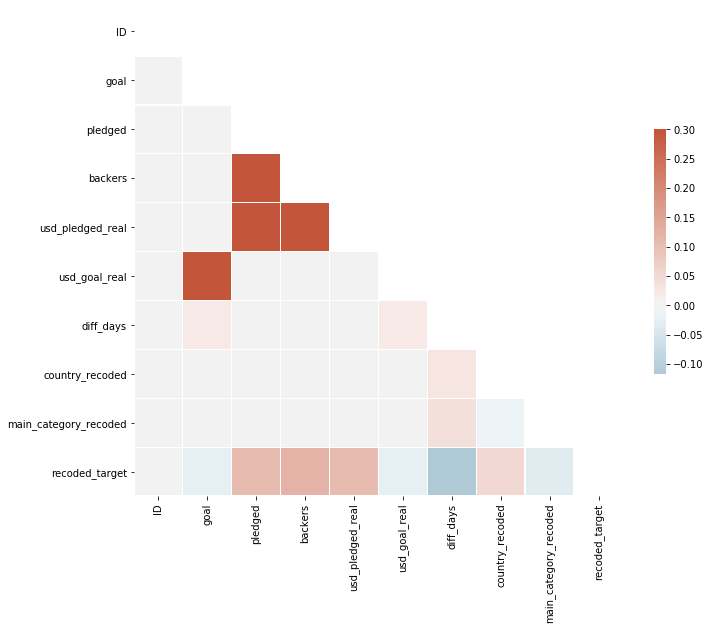

In [18]:
#correlation matrix 
corrmatrix = kick.corr()
corrmatrix 

#not sure how to do this because there are SO many categories, but we might have to recode the category in some way but it has 21,000+ categories 

#prettier correlation matrix 
#SOURCE: https://seaborn.pydata.org/examples/many_pairwise_correlations.html
mask = np.triu(np.ones_like(corrmatrix, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corrmatrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [19]:
kick.head()
print(list(kick))

#without goal and pledged in the native currency 
kick2 = kick.iloc[:, np.r_[0:4, 6:len(kick.columns)]]


kick2.head()

['ID', 'name', 'category', 'main_category', 'goal', 'pledged', 'state', 'backers', 'country', 'usd_pledged_real', 'usd_goal_real', 'deadline_date', 'launched_date', 'diff_days', 'country_recoded', 'main_category_recoded', 'recoded_target']


,ID,name,category,main_category,state,backers,country,usd_pledged_real,usd_goal_real,deadline_date,launched_date,diff_days,country_recoded,main_category_recoded,recoded_target
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,failed,0,GB,0.00000,1533.95000,2015-10-09,2015-08-11,59,9,12,0
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,failed,15,US,2421.00000,30000.00000,2017-11-01,2017-09-02,60,22,6,0
2,1000004038,Where is Hank?,Narrative Film,Film & Video,failed,3,US,220.00000,45000.00000,2013-02-26,2013-01-12,45,22,6,0
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,failed,1,US,1.00000,5000.00000,2012-04-16,2012-03-17,30,22,10,0
5,1000014025,Monarch Espresso Bar,Restaurants,Food,successful,224,US,52375.00000,50000.00000,2016-04-01,2016-02-26,35,22,7,1


In [20]:
#without id and name of project 
print(list(kick2))

kick3 = kick2.iloc[:, 3:len(kick.columns)]


['ID', 'name', 'category', 'main_category', 'state', 'backers', 'country', 'usd_pledged_real', 'usd_goal_real', 'deadline_date', 'launched_date', 'diff_days', 'country_recoded', 'main_category_recoded', 'recoded_target']


In [23]:
kick3.head()

,main_category,state,backers,country,usd_pledged_real,usd_goal_real,deadline_date,launched_date,diff_days,country_recoded,main_category_recoded,recoded_target
0,Publishing,failed,0,GB,0.00000,1533.95000,2015-10-09,2015-08-11,59,9,12,0
1,Film & Video,failed,15,US,2421.00000,30000.00000,2017-11-01,2017-09-02,60,22,6,0
2,Film & Video,failed,3,US,220.00000,45000.00000,2013-02-26,2013-01-12,45,22,6,0
3,Music,failed,1,US,1.00000,5000.00000,2012-04-16,2012-03-17,30,22,10,0
5,Food,successful,224,US,52375.00000,50000.00000,2016-04-01,2016-02-26,35,22,7,1


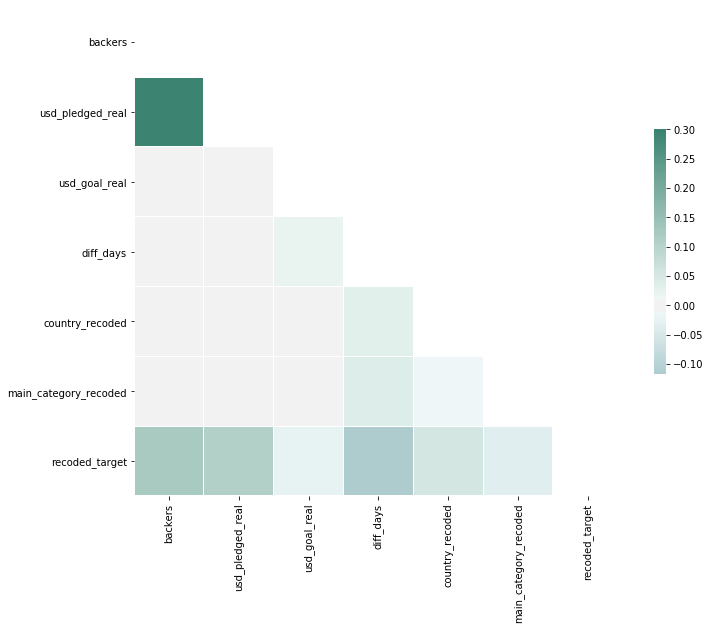

In [40]:
#viewing the correlation for a cleaned dataset with redundant varibles removed

cor_mat = kick3.corr()
cor_mat

mask = np.triu(np.ones_like(cor_mat, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(200, 165, as_cmap=True)
sns.heatmap(cor_mat, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [41]:
#saving the updated dataset 
kick3.to_csv('C:/Users/mayaa/OneDrive/Documents/project_BA/Kickstarter-Project-/kick.csv', index = None)


## Visualizations 

In [ ]:
#https://pythonspot.com/matplotlib-bar-chart/ 

main_cats = kick3['main_category']
y_pos = np.arange(len(main_cats))
performance = kick['usd_pledged_real']

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, main_cats)
plt.ylabel('USD Pledged')
plt.title('Amount Pledged by Main Category')

plt.show()